# Decision Trees and Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
sns.set_context(context='notebook', font_scale=1)

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.shape

(81, 4)

In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


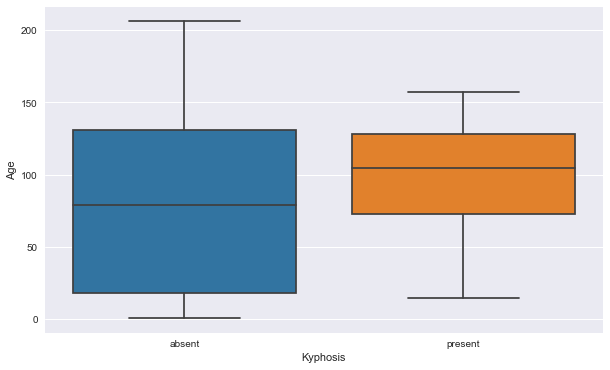

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='Age', x='Kyphosis')

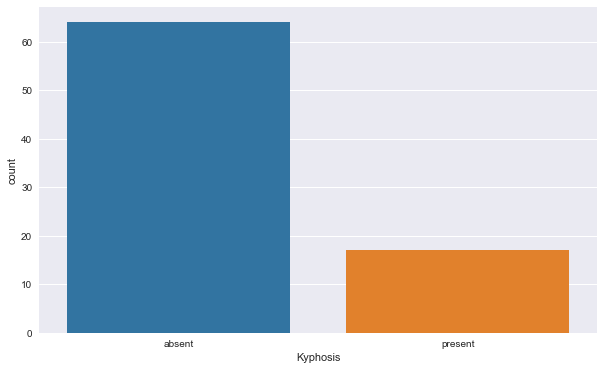

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='Kyphosis', data=df)

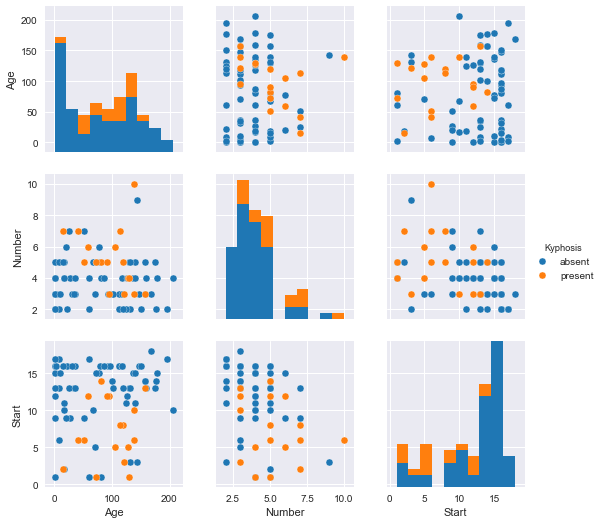

In [12]:
sns.pairplot(df, hue='Kyphosis')

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Kyphosis', axis=1)
y= df['Kyphosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction and Evaluation

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[20  0]
 [ 4  3]]


             precision    recall  f1-score   support

     absent       0.83      1.00      0.91        20
    present       1.00      0.43      0.60         7

avg / total       0.88      0.85      0.83        27



### Random Forests

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rfc_pred = rfc.predict(X_test)

In [49]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, rfc_pred))

Confusion Matrix:
[[20  0]
 [ 6  1]]


Classification Report:
             precision    recall  f1-score   support

     absent       0.77      1.00      0.87        20
    present       1.00      0.14      0.25         7

avg / total       0.83      0.78      0.71        27

